# Homework Part I

1. I have a drug group and a placebo group. I want some quantitative confirmation to see if they produce the ***same*** or ***different*** outcomes: `drug-A` and `placebo-A`.

2. I have a drug group and a placebo group: `drug-B` and `placebo-B`. The mean outcome is ***lower*** in the placebo group and I have a theory that may explain this, but I first need to rule out the possibility that the lower outcome is just due to chance.

In each case construct (i.e. actually write down) your two hypotheses, decide from how they are worded, whether they are one-tailed or two-tailed, then use statistical tests to assess which you should accept.

Hints:

* Test data sets for normality (are they pretty, do they have a normal distribution?). Use the test we have not used yet, the D’Agostino & Pearson test to provide probabilities of normality (prettiness).

* Test whether means differ significantly: When testing if means are different, you should use use either a two-tailed Mann-Whitney p-value, or a two-tailed T-test p-value, depending on the result of the normality test. Remember that `scipy.stats`'s `Mann-Whitney` function returns a one-tailed p-value.

H0:the placebo have SAME effect compared to drug

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

1. **Test the Normaliy**

In [40]:
# Read in the records.

dA = np.recfromcsv("data2/drug-A.csv", names = None) 
dB = np.recfromcsv("data2/drug-B.csv", names = None) 
pA = np.recfromcsv("data2/placebo-A.csv", names = None) 
pB = np.recfromcsv("data2/placebo-B.csv", names = None) 

Skew =  1.287411721043734
H0 -come from a normal distribution: 
Accept.


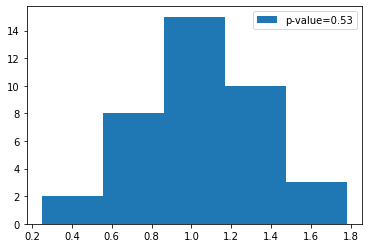

In [41]:
data = np.array(dA, dtype=float)

k2, p = normaltest(data)
print ("Skew = ", k2)
print ("H0 -come from a normal distribution: ")
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

plt.hist(data, bins=5)
plt.legend(("p-value=%.2g"%p, ))

Skew =  20.701784062790804
H0 -come from a normal distribution: 
Reject in favor of H1.


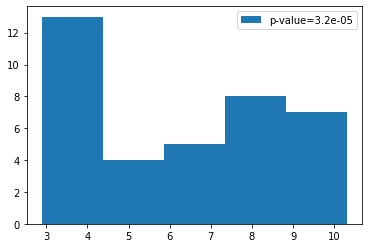

In [42]:
data = np.array(dB, dtype=float)

k2, p = normaltest(data)
print ("Skew = ", k2)
print ("H0 -come from a normal distribution: ")
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

plt.hist(data, bins=5)
plt.legend(("p-value=%.2g"%p, ))

Skew =  1.2202628948918977
H0 -come from a normal distribution: 
Accept.


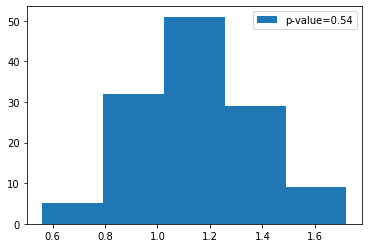

In [43]:
data = np.array(pA, dtype=float)

k2, p = normaltest(data)
print ("Skew = ", k2)
print ("H0 -come from a normal distribution: ")
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

plt.hist(data, bins=5)
plt.legend(("p-value=%.2g"%p, ))

Skew =  2.0203883984723765
H0 -come from a normal distribution: 
Accept.


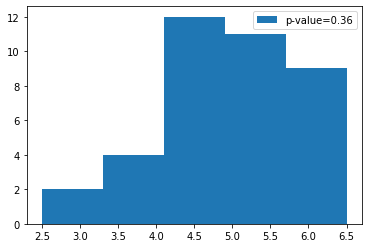

In [44]:
data = np.array(pB, dtype=float)

k2, p = normaltest(data)
print ("Skew = ", k2)
print ("H0 -come from a normal distribution: ")
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

plt.hist(data, bins=5)
plt.legend(("p-value=%.2g"%p, ))

- drugA's distribution is normal  
- drugB's distrrbution is **not normal**  
- placeboA's distribution is  normal
- placeboB's distribution is noamal

## I have a drug group and a placebo group. I want some quantitative confirmation to see if they produce the same or different outcomes: drug-A and placebo-A.

Accorind to the title, We could conclude that it is a **Two-tailed** test  
and drugA and placeboA's distributions are normal, so we could use Two-tailed test.

- H0: They product the same outcomes
- H1: They produce the different outcomes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12ecddf90>,
      dtype=object)

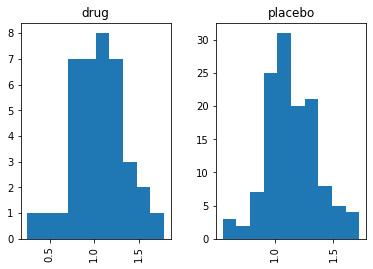

In [47]:
colnames=['outcome'] 
drugA = pd.read_csv('data2/drug-A.csv',names=colnames, header=None)
drugA['group']='drug'
placeboA = pd.read_csv('data2/placebo-A.csv',names=colnames, header=None)
placeboA['group']='placebo'
trial_data = pd.concat([drugA, placeboA], ignore_index=True)
trial_data.hist('outcome', by='group')

In [51]:
combined_outcome = np.concatenate((drugA.outcome, placeboA.outcome))
print(len(drugA.outcome))
print(len(placeboA.outcome))
print( drugA.outcome.mean() )
print( placeboA.outcome.mean() )
print( combined_outcome.mean() )

# we run the t-test without supposing the variance is the same (more general)
ttest_ind(a= drugA.outcome,
          b= placeboA.outcome,
          equal_var=False)

38
126
1.0489473684210526
1.1421428571428573
1.1205487804878047


Ttest_indResult(statistic=-1.7473607598380747, pvalue=0.08686705804164516)

- **0.09 > 0.05**
- we should accept the null hypothesis: They product the same outcomes

## I have a drug group and a placebo group: drug-B and placebo-B. The mean outcome is lower in the placebo group and I have a theory that may explain this, but I first need to rule out the possibility that the lower outcome is just due to chance.

Accorind to the title, We could conclude that it is a **One-tailed** test  
and drugB's distribution is not normal, so we shoud use scipy.stats's Mann-Whitney

- H0: The mean outcome is higher in the placebo group
- H1: The mean outcome is low in the placebo group

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12ee4e850>,
      dtype=object)

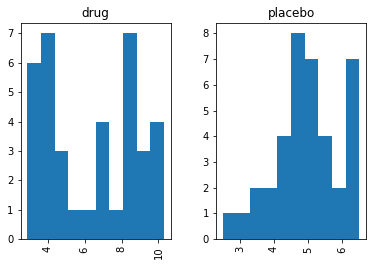

In [57]:
colnames=['outcome'] 
drugB = pd.read_csv('data2/drug-B.csv',names=colnames, header=None)
drugB['group']='drug'
placeboB = pd.read_csv('data2/placebo-B.csv',names=colnames, header=None)
placeboB['group']='placebo'
trial_data = pd.concat([drugB, placeboB], ignore_index=True)
trial_data.hist('outcome', by='group')

In [78]:
mannwhitneyu(placeboB.outcome, drugB.outcome, use_continuity=True, alternative = 'less')

MannwhitneyuResult(statistic=512.5, pvalue=0.021983043515195907)

- **0.02 < 0.05**
- we should reject the null hypothesis: The mean outcome is higher in the placebo group